# Logistic Regression Project 

In this project, I will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. I will try to create a simple model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

I will read in the advertising.csv file and set it to a data frame called ad_data.

In [2]:
ad_data = pd.read_csv("advertising.csv")

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
len(ad_data)

1000

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
ad_data.select_dtypes(["int64","float64"])

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [8]:
ad_data.select_dtypes("object")

,Ad Topic Line,City,Country,Timestamp
0,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia,2016-03-27 00:53:11
1,Monitored national standardization,West Jodi,Nauru,2016-04-04 01:39:02
2,Organic bottom-line service-desk,Davidton,San Marino,2016-03-13 20:35:42
3,Triple-buffered reciprocal time-frame,West Terrifurt,Italy,2016-01-10 02:31:19
4,Robust logistical utilization,South Manuel,Iceland,2016-06-03 03:36:18
...,...,...,...,...
995,Fundamental modular algorithm,Duffystad,Lebanon,2016-02-11 21:49:00
996,Grass-roots cohesive monitoring,New Darlene,Bosnia and Herzegovina,2016-04-22 02:07:01
997,Expanded intangible solution,South Jessica,Mongolia,2016-02-01 17:24:57
998,Proactive bandwidth-monitored policy,West Steven,Guatemala,2016-03-24 02:35:54


## Exploratory Data Analysis

I will now use seaborn to explore the data. I will begin by creating a histogram of the Age.

<AxesSubplot:xlabel='Age', ylabel='Count'>

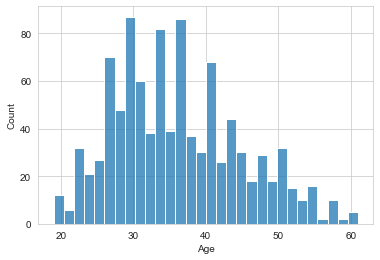

In [9]:
sns.set_style(style="whitegrid")

sns.histplot(data=ad_data["Age"],bins=30)

This looks reasonably normally distributed around 35.

**Now I will create a jointplot showing Area Income versus Age.**

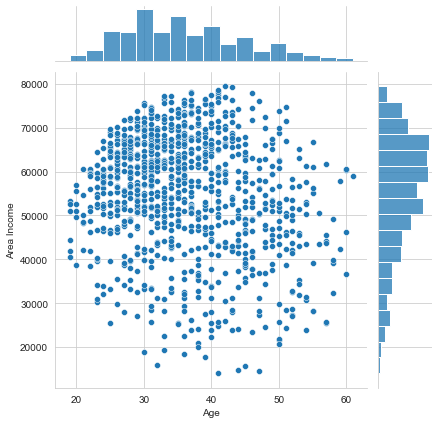

In [10]:
sns.jointplot(x="Age",y="Area Income",data=ad_data)

It seems that there is a bit of a trend, since people start getting an income around the age of 20 which makes sense. Once, older this tends to increase but as you get older than that, income starts to decrease or stops.

**Next, I will create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

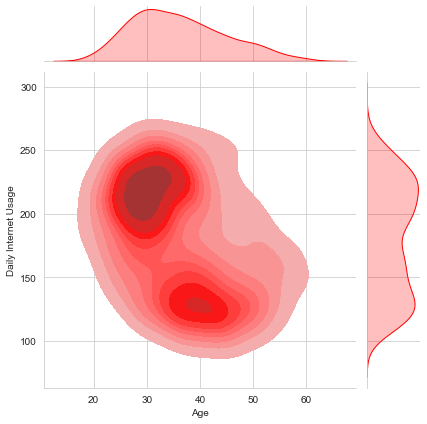

In [11]:
sns.jointplot(x="Age",y="Daily Internet Usage",data=ad_data,kind="kde",color="red",fill=True)

As expected, internet usage peaks with pople aged around 30. But, this drops as age continues to increases.

**Now I will create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

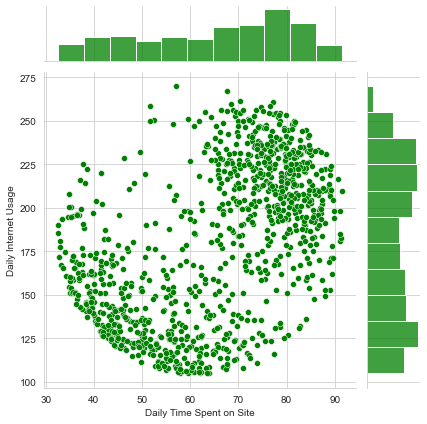

In [12]:
sns.jointplot(x="Daily Time Spent on Site", y="Daily Internet Usage", data=ad_data,color="green")

It seems there is a circular patterns which appears to have two distinct clusters. 

**To explore this, I will create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

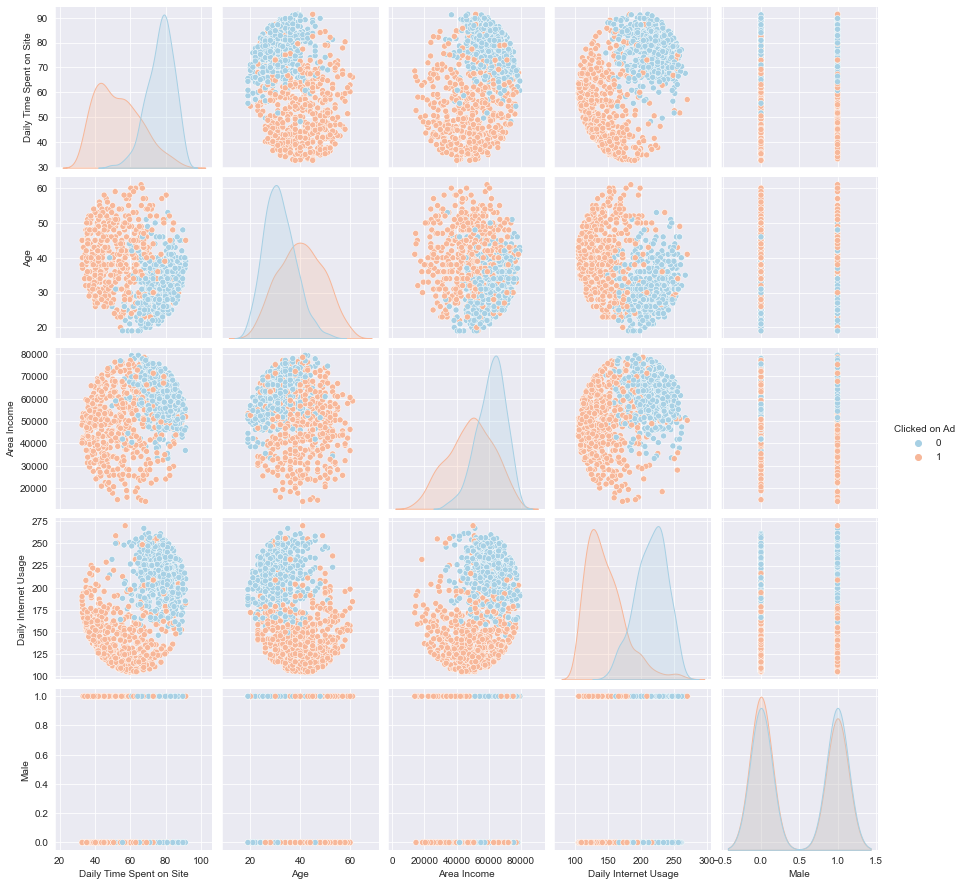

In [13]:
sns.set_style(style="darkgrid")
sns.pairplot(data=ad_data, hue="Clicked on Ad", palette="RdBu_r",kind="scatter")

The points seem to be generally separated which is already a very good indication.

# Logistic Regression model

Now I will do a train test split, scale the data and train the model.

To begin, I will only select columns with "int64" and "float64" data types from the dataset. If the result is not satisfactory, I will look into using the "object" dtypes columns including the Timestamp column.

In [14]:
ad_data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [15]:
from sklearn.model_selection import train_test_split 

In [16]:
X = ad_data[["Daily Time Spent on Site", "Age", "Area Income", "Male","Daily Internet Usage"]]

In [17]:
y = ad_data["Clicked on Ad"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
X_train

,Daily Time Spent on Site,Age,Area Income,Male,Daily Internet Usage
290,50.52,31,72270.88,0,171.62
167,86.06,31,53767.12,1,219.72
486,83.97,40,66291.67,1,158.42
683,76.83,28,67990.84,0,192.81
876,67.39,44,51257.26,0,107.19
...,...,...,...,...,...
575,48.86,54,53188.69,0,134.46
838,44.13,40,33601.84,1,128.48
337,75.32,28,59998.50,1,233.60
523,67.94,43,68447.17,0,128.16


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_train

array([[0.30460649, 0.28571429, 0.89192071, 0.        , 0.4268496 ],
       [0.90872004, 0.28571429, 0.60871072, 1.        , 0.73522246],
       [0.87319395, 0.5       , 0.80040569, 1.        , 0.34222336],
       ...,
       [0.72616012, 0.21428571, 0.70408534, 1.        , 0.82420823],
       [0.60071392, 0.57142857, 0.83339677, 0.        , 0.14822413],
       [0.74859765, 0.47619048, 0.79926757, 1.        , 0.87485575]])

In [23]:
X_test = scaler.transform(X_test)
X_test

array([[0.1699813 , 0.85714286, 0.62944253, 0.        , 0.40550071],
       [0.81234064, 0.28571429, 0.80006621, 0.        , 0.70329529],
       [0.70406255, 0.30952381, 0.89195163, 0.        , 0.67636877],
       ...,
       [0.65136835, 0.47619048, 0.8039431 , 1.        , 0.92813181],
       [0.07258202, 0.4047619 , 0.23573757, 0.        , 0.58257469],
       [0.62587115, 0.14285714, 0.79274527, 0.        , 0.69457623]])

In [24]:
from sklearn.linear_model import LogisticRegression 

In [25]:
logmodel = LogisticRegression()

In [26]:
logmodel.fit(X_train, y_train)

LogisticRegression()

## Predictions and Evaluations

In [27]:
predictions = logmodel.predict(X_test)
predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], d

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       157
           1       0.99      0.94      0.96       143

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [30]:
confusion_matrix(y_test,predictions)

array([[155,   2],
       [  9, 134]], dtype=int64)

It seems that the model is doing pretty well. I am getting over 90% on precission, recall and f1-score. I have few mislabelled points but I would consider this acceptable given the size of the dataset.